# Computer Simulations

Computer simulations are incredibly powerful. They allow us to compute the likely outcomes of situations or events when it would be difficult, expensive, or impossible to recreate the situations or events in the real world many times over.

As a simple example, engineers working on a two-stage rocket would obviously like to know where the first stage is likely to land once it detaches and falls to earth. Of course, equations using Newtonian physics and aerodynamics can used to predict an expected spot for impact. But, obviously, it won't hit in that exact spot every time. So what we really want is a *distribution*, like a 2D histogram, of likely landing spots. In other words, a map of the danger zone. To construct a map of the danger zone, we could:

- Build a bunch of rockets and test-fire them into space, recording the impact coordinates of the first stage each time.
- Tinker with the constants in the equations (such as wind speed and direction at various altitudes) by hand, recording the impact coordinates each time.

The second option would be incredibly tedious and would be subject to bias  (how would the exact wind directions be chosen?). The first option would expensive, time-consuming and, of course, incredibly dangerous. 

A second example is forcasting the landfall of hurricanes. Here, it's obviously impossible to "test fire" a bunch of hurricanes and, even if we could, doing so would defeat the vary purpose of forcasting the landfall. Very elaborate sets of equations can predict *a* landfall for a particular set of constants (ocean temperatures, prevailing winds, etc.) but, again, what we want is a *distribution* of likely locations for landfall – a map of the danger zone.

In each of these situations, the solution is to run the equations on a computer – that is, do a simulation – many many times and, each time, having the computer select probable values for the constants (air temperature etc.) *at random*. Having the values for the constants be set to new random values each time will make the final outcome – impact site, landfall location, etc. – also vary, and the final distribution of these outcomes will give us the information we want. 

The key to doing this, however, is to be able to pump realistic *random* values into the equations on each simulation. So where do we get these random numbers?

## Pseudorandom Numbers

A computer is a deterministic machine meaning that, in any given state, it will always produce the same output for a given input. So how can a computer possibly produce random numbers? It can't. But it can produce ***pseudorandom numbers***, which are sequences of numbers that are random *for all practical intents and purposes*.

Pseudorandom numbers are so widely used and so good (that is, statistically indistinguishable from true random numbers) that most books and articles on computer refer to them simply as "random numbers". Similarly, the algorithms and programs used to generate them are called "random number generators".

The way computers make random numbers is conceptually quite simple. A starting value – a "seed" – is passed through an algorithm that produces a single output value, the first "random" number. This output is passed back though the algorithm to produce the second random number, and so on. The trick is to design an algorithm that makes it almost impossible to guess the input value from the output value. In other words, the numbers should appear to be unrelated or *independent*, and therefore random.

Here is a very simple (pseudo) random number generator. Take a three numbers

- a number, *s*, the "seed"
- a number, *a*, called the "multiplier"
- and a number, *m*, called the "modulus

Compute the remainder – the modulus – of *seed* \* *a* / *m*

That's our first random number. To get the second, we feed the first back into the equation in place of the seed, and so on.

Here is code to implement the above algorithm – a simple random number generator!

In [27]:
s, a, m =1, 10, 23  # seed, multiplier, modulus
prands = []         # empty list to hold our numbers

for i in range(20) :
    if i > 0 :
        x = (prands[i-1]*a)%m
        prands.append(x)
    else :
        x = (s*a)%m
        prands.append(x)
        
prands

[10, 8, 11, 18, 19, 6, 14, 2, 20, 16, 22, 13, 15, 12, 5, 4, 17, 9, 21, 3]

See if you can find a pattern in these numbers!

---

Re-run the above code with various values for the seed. What happens?

---

Playing with the above code hopefully made you realize that this simple random number generator is actually not a good one. A moment's thought should convince us that, if a random number generator outputs a number, say a 5, that it has already generated, the sequence between the first and second 5 will just keep repeating. It has to, because the algorithm will always generate the same output for a given input! And sequences of numbers that repeat are not random!

Modern random number generators are quite good; we don't need to worry about them, we just need to use them. Importantly, however, they are still algorithms, which means that given the same starting point – the seed – they will always produce the same sequence of numbers. This is a feature not a bug! It means that as long as we know our seed, we can always reproduce our analyses!

> Note: Modern computers operating systems are gathering true random numbers all the time, like the timing between your keyboard strokes, mouse movements, and even the small fluctuations in noise around the computer! It uses these random numbers to encrypt your data and communications. If you don't specify a seed, numpy will dip into the random numbers used by your computer's OS. Older computers would use something like the system time or time since startup.

## Preliminaries

In order to actually do simulations, we are going to be using the random number generating capabilities of numpy, so let's import it as usual. We're also going to want to make some histograms, so let's import Seaborn as well.

In [106]:
import numpy as np
import seaborn as sns
%matplotlib inline    

The prefered method for getting random numbers using numpy is a two step process. The process is:

1. Create a random number generator object at the start of a script or simulation
2. Use that random number generator to draw samples from you desired distribution

Here's how we create a random number generator with a seed of 42:

In [63]:
rng = np.random.default_rng(42) # seed with the answer to the ultimate question

We can now use this generator through out a given project. If we wanted a number from a normal distribution, for example, we would call the `rng.normal()` method.

In [64]:
rng.normal()

0.30471707975443135

As always, we can use `rng.<tab>` to see what methods (statistical distributions in this case) are available. We can then use the help (e.g. `help(rng.normal`) to get help for that particular method.

---

In the cell below, get 100 samples from the Student's *t* distribution with 41 degrees of freedom, and plot the resulting distribution.

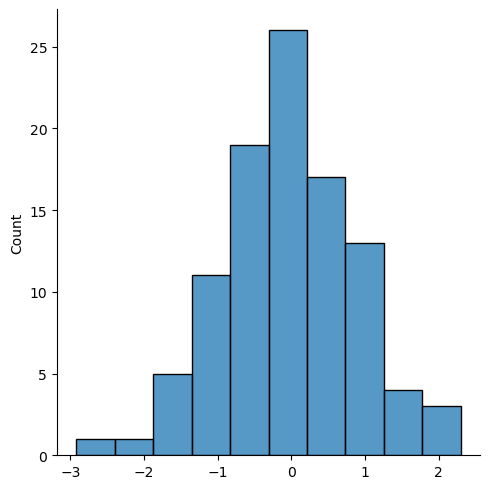

In [107]:
sns.displot(rng.standard_t(41, 100))

Re-run the above a few times. Do the distributions look reasonable for a *t* distribution with *df* > 30?

---

## Simple simulations

To get the idea of simulations, let's start by simulating a couple of very simple situations, coin flips and rolls of the dice.

### Coin Flips

A coin flip is probably the simplest physical situation we could simulate, so that's a great place to start. Any situation that has to have one of two outcomes is known as a Bernoulli trial (after a famous mathematicion Daniel Bernoulli). This includes coin flips, answers to yes/no questions, consumer "to buy or not to buy" choices, voting, etc. 

Generally, we are interested in the sum of the results of many Bernoulli trials – for example the number of people that voted for canditate A (vs. candidate B) determines the winner of an election. This outcome, the sum of some number of Bernolli trials, has a *binomial* distribution. Thus, such simulations are done using the `rng.binomial()` method. The binomial distribution has two parameters, the number of trials (e.g. the number of people voting in an election), and the probability of one of the outcomes (note that only one probability is needed, because the probability of the second is 1 minus the probability of the first.

Here is a simulation of election – the number of votes for candidate A – in which 1 million people voted and candidate A was leading in the polls at 52% vs. 48%.

In [100]:
rng.binomial(1000000, .52)

520302

#### A Fair Coin

In [44]:
rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
s = rng.binomial(n, p, 1000)

#### An Unfair Coin

In [ ]:
rng = np.random.default_rng()
rng.random()

### Dice Rolls

#### One fair die

In [ ]:
rng.multinomial(100, [1/6.]*6)

#### Two Fair Dice

#### Many Fair Dice

#### A Loaded Die

In [ ]:
rng.multinomial(100, [1/7.]*5 + [2/7.])

#### Two Loaded Dice

#### Many Loaded Dice

## Simulating Sports

## Simulating Elections